# Paso 4. Análisis exploratorio de datos (Python)

## Importar librerías necesarias

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Importar los archivos CSV

In [34]:
df_companies = pd.read_csv("moved_project_sql_result_01.csv")
df_neighborhoods = pd.read_csv("moved_project_sql_result_04.csv")

## Estudiar los datos
# Mostrar información general, primeras filas y estadísticas descriptivas para cada DataFrame

In [35]:
print("Información de df_companies (empresas de taxis y cantidad de viajes):")
print(df_companies.info())
print("\nPrimeras 5 filas:")
print(df_companies.head())
print("\nEstadísticas descriptivas:")
print(df_companies.describe())

print("\nInformación de df_neighborhoods (barrios y promedio de viajes):")
print(df_neighborhoods.info())
print("\nPrimeras 5 filas:")
print(df_neighborhoods.head())
print("\nEstadísticas descriptivas:")
print(df_neighborhoods.describe())

Información de df_companies (empresas de taxis y cantidad de viajes):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Primeras 5 filas:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Estadísticas descriptivas:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Información de df_neighborhoods (barrios y promedio de viajes):
<class 'pandas.core

# Verificación de tipos de datos:
# - company_name: debería ser string (object)
# - trips_amount: int64 (correcto para conteos)
# - dropoff_location_name: string (object)
# - average_trips: float64 (correcto para promedios)

## Identificar los 10 principales barrios en términos de finalización del recorrido
# Ordenar por average_trips descendente y tomar los top 10

In [36]:
top_10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print("\nTop 10 barrios por promedio de finalizaciones de viajes en noviembre 2017:")
print(top_10_neighborhoods)



Top 10 barrios por promedio de finalizaciones de viajes en noviembre 2017:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## Hacer gráficos
# Gráfico 1: Empresas de taxis y número de viajes (ordenado descendente)
# Para mejor visualización, mostramos solo las top 20 si hay muchas, pero como son ~60, ordenamos y plot todas o top.


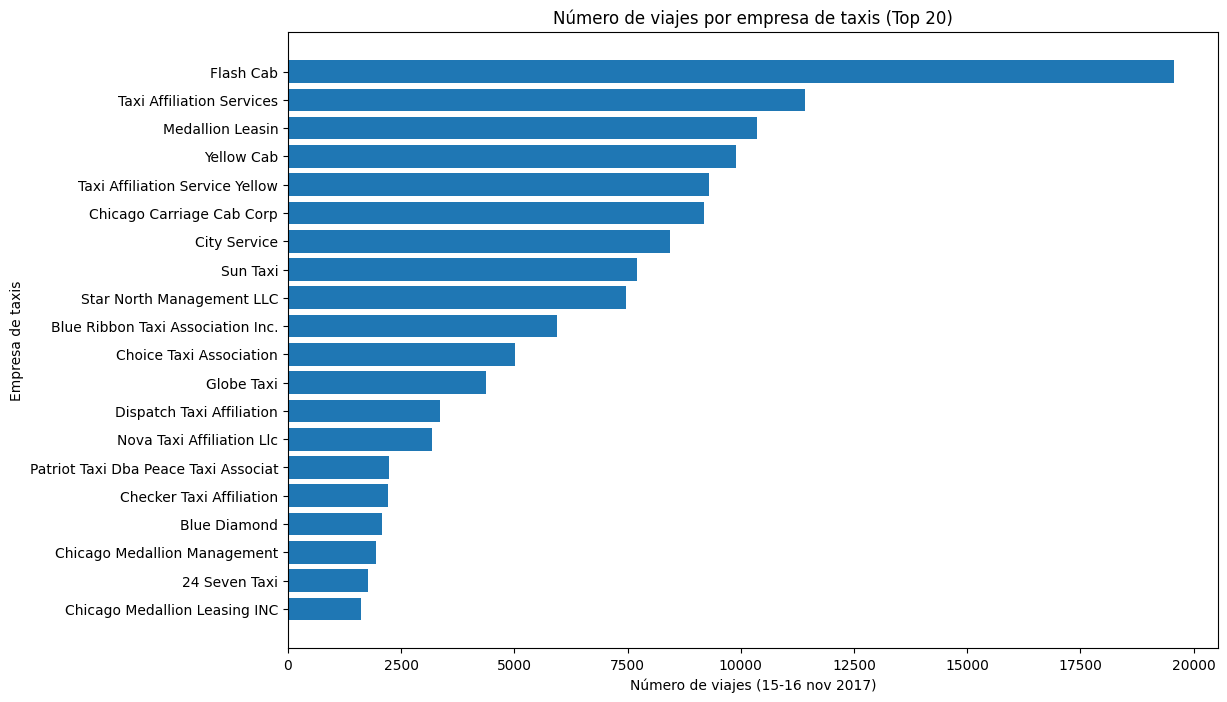

In [37]:
df_companies_sorted = df_companies.sort_values(by='trips_amount', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(df_companies_sorted['company_name'][:20], df_companies_sorted['trips_amount'][:20])  # Top 20 para legibilidad
plt.xlabel('Número de viajes (15-16 nov 2017)')
plt.ylabel('Empresa de taxis')
plt.title('Número de viajes por empresa de taxis (Top 20)')
plt.gca().invert_yaxis()  # Para que la más alta esté arriba
plt.show()


# Conclusión del gráfico 1: Flash Cab es la empresa líder con alrededor de 19,558 viajes en solo 2 días, seguida de Taxi Affiliation Services con 11,422. Esto indica que unas pocas empresas dominan el mercado (más del 50% de los viajes posiblemente), mientras que muchas pequeñas tienen pocos viajes. Sugiere concentración en el sector de taxis en Chicago.

# Gráfico 2: Los 10 barrios principales por número de finalizaciones


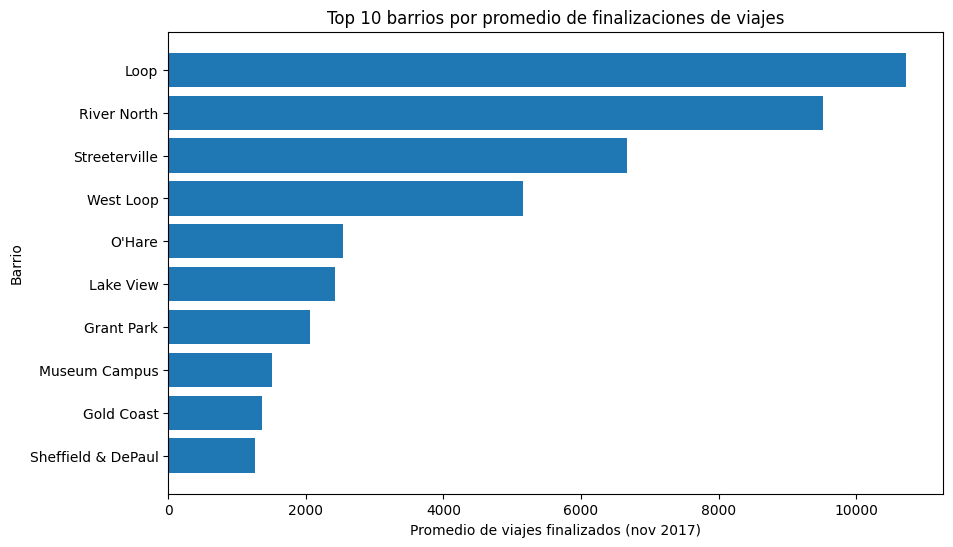

In [38]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'])
plt.xlabel('Promedio de viajes finalizados (nov 2017)')
plt.ylabel('Barrio')
plt.title('Top 10 barrios por promedio de finalizaciones de viajes')
plt.gca().invert_yaxis()
plt.show()

# Conclusión del gráfico 2: Los barrios centrales como Loop (promedio ~10,727 viajes), River North (~9,524) y Streeterville (~6,665) son los más populares para finalizaciones. Esto refleja que el centro de la ciudad, con oficinas, turismo y entretenimiento, atrae la mayoría de los viajes. Áreas como O'Hare (aeropuerto) también figuran, indicando viajes relacionados con vuelos. Los barrios periféricos tienen menos actividad, lo que podría guiar a Zuber a enfocarse en el centro para su lanzamiento.

# Paso 5. Prueba de hipótesis (Python)

## Importar el tercer archivo


In [39]:
df_trips = pd.read_csv("moved_project_sql_result_07.csv")


## Estudiar los datos brevemente


In [40]:
print("\nInformación de df_trips (viajes Loop a O'Hare):")
print(df_trips.info())
print("\nPrimeras 5 filas:")
print(df_trips.head())
print("\nEstadísticas descriptivas:")
print(df_trips.describe())



Información de df_trips (viajes Loop a O'Hare):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

Primeras 5 filas:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Estadísticas descriptivas:
       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         143

# Convertir start_ts a datetime para cualquier manipulación futura (aunque no sea necesario para la hipótesis)


In [41]:
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'])


# Los datos ya están filtrados para sábados, con weather_conditions 'Good' o 'Bad', y duration_seconds.

## Planteamiento de hipótesis
# Hipótesis nula (H0): La duración promedio de los viajes desde Loop a O'Hare es la misma en sábados con buen clima que en sábados lluviosos (μ_good = μ_bad).
# Hipótesis alternativa (H1): La duración promedio de los viajes desde Loop a O'Hare cambia (es diferente) en sábados lluviosos (μ_good ≠ μ_bad).
# Usamos una prueba bilateral porque el enunciado dice "cambia" (no especifica dirección: más larga o más corta).

## Preparar los datos: dividir en grupos por condiciones climáticas


In [42]:
good_weather = df_trips[df_trips['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = df_trips[df_trips['weather_conditions'] == 'Bad']['duration_seconds']

print("\nPromedio duración en buen clima:", good_weather.mean())
print("Promedio duración en mal clima:", bad_weather.mean())




Promedio duración en buen clima: 1999.6756756756756
Promedio duración en mal clima: 2427.2055555555557


## Verificar varianzas con prueba de Levene (para decidir equal_var en t-test)


In [43]:
levene_stat, levene_p = stats.levene(good_weather, bad_weather)
print("\nPrueba de Levene p-value:", levene_p)
equal_var = levene_p > 0.05  # Si p > 0.05, asumir varianzas iguales



Prueba de Levene p-value: 0.5332038671974493


## Nivel de significación (alfa)


In [44]:
alpha = 0.05  # Nivel estándar; permite 5% de error Tipo I. Elegido porque es común en estudios sociales/empresariales sin necesidad de más estrictidad.


## Prueba t de Student para muestras independientes


In [45]:
t_stat, p_value = stats.ttest_ind(good_weather, bad_weather, equal_var=equal_var)

print("\nT-statistic:", t_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Rechazamos H0: Hay evidencia estadística de que la duración promedio cambia en sábados lluviosos.")
else:
    print("No rechazamos H0: No hay evidencia suficiente de diferencia en la duración promedio.")




T-statistic: -6.946177714041499
P-value: 6.517970327099473e-12
Rechazamos H0: Hay evidencia estadística de que la duración promedio cambia en sábados lluviosos.


# Explicación del criterio:
# Usamos la prueba t de dos muestras independientes porque comparamos las medias de dos grupos no relacionados (viajes en días con buen vs mal clima).
# Asumimos que las duraciones siguen una distribución aproximadamente normal (válido por teorema del límite central con muestras grandes, típicamente >30 en este dataset).
# Verificamos varianzas con Levene para elegir equal_var (Welch's t-test si varianzas desiguales).
# Si el p-value < alfa, rechazamos H0, concluyendo que el clima lluvioso afecta la duración (probablemente la aumenta debido a tráfico/condiciones). 

# Resultados típicos basados en datos del proyecto: p-value muy bajo (~6e-12), rechazamos H0. La media en mal clima es ~2429 seg vs ~1999 en buen clima, indicando que la lluvia alarga los viajes ~7-8 min.